In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sympy import diff, symbols

In [2]:
dirty_data = pd.read_csv("9246634-cost-revenue-dirty.csv")

In [3]:
columns_name = {"Release Date":"Release_Date",
                "Movie Title":"Title",
                "Production Budget ($)":"Budget_usd",
                "Worldwide Gross ($)":"Gross_usd"}
dirty_data.rename(columns=columns_name, inplace=True)

In [4]:
dirty_data.drop("Domestic Gross ($)", axis=1, inplace=True)

In [5]:
dirty_data[dirty_data.columns[4]].replace('[\$,\,]', '', regex=True, inplace=True)
dirty_data[dirty_data.columns[3]].replace('[\$,\,]', '', regex=True, inplace=True)

In [6]:
dirty_data["Budget_usd"] = dirty_data["Budget_usd"].astype(float)
dirty_data["Gross_usd"] = dirty_data["Gross_usd"].astype(float)

In [7]:
dirty_data.drop(dirty_data[dirty_data["Gross_usd"]==0].index, inplace=True)

In [8]:
dirty_data.reset_index(inplace=True, drop=True)

In [9]:
dirty_data

,Rank,Release_Date,Title,Budget_usd,Gross_usd
0,5293,8/2/1915,The Birth of a Nation,110000.0,11000000.0
1,5230,12/24/1916,"20,000 Leagues Under the Sea",200000.0,8000000.0
2,5299,9/17/1920,Over the Hill to the Poorhouse,100000.0,3000000.0
3,5222,1/1/1925,The Big Parade,245000.0,22000000.0
4,4250,12/30/1925,Ben-Hur,3900000.0,9000000.0
...,...,...,...,...,...
5029,914,10/2/2017,Fifty Shades Darker,55000000.0,376856949.0
5030,1295,10/2/2017,John Wick: Chapter Two,40000000.0,166893990.0
5031,70,10/3/2017,Kong: Skull Island,185000000.0,561137727.0
5032,94,12/5/2017,King Arthur: Legend of the Sword,175000000.0,140012608.0


In [10]:
data = dirty_data.sample(frac=1)

In [11]:
data = data.reset_index(drop=True)

In [12]:
train_data = data[:int(len(data)*0.85)]

In [13]:
test_data = data[int(len(data)*0.85):]

In [14]:
x_train, x_cv, y_train, y_cv = train_test_split(train_data[["Budget_usd"]], train_data[['Gross_usd']], test_size=0.3)

In [15]:
x_train = np.array(x_train)
x_train = x_train.reshape(-1, 1)

y_train = np.array(y_train)
y_train = y_train.reshape(-1, 1)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
model.score(x_train, y_train)

0.5526243480441737

In [18]:
model_2 = RandomForestRegressor()
model_2.fit(x_train, y_train)

C:\Users\mahdi\AppData\Local\Temp\ipykernel_12264\1273858837.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_2.fit(x_train, y_train)


RandomForestRegressor()

In [19]:
model_2.score(x_train, y_train)

0.6813749910069692

In [20]:
x_cv = np.array(x_cv).reshape(-1, 1)
y_cv = np.array(y_cv).reshape(-1, 1)

In [21]:
model.score(x_cv, y_cv)

0.547734609534545

In [22]:
model_2.score(x_cv, y_cv)

0.450920999513296

In [23]:
dirty_data.describe()

,Rank,Budget_usd,Gross_usd
count,5034.000000,5.034000e+03,5.034000e+03
mean,2571.987882,3.290784e+07,9.515685e+07
std,1513.859403,4.112589e+07,1.726012e+08
min,1.000000,1.100000e+03,2.600000e+01
25%,1266.250000,6.000000e+06,7.000000e+06
50%,2543.500000,1.900000e+07,3.296202e+07
75%,3839.750000,4.200000e+07,1.034471e+08
max,5391.000000,4.250000e+08,2.783919e+09


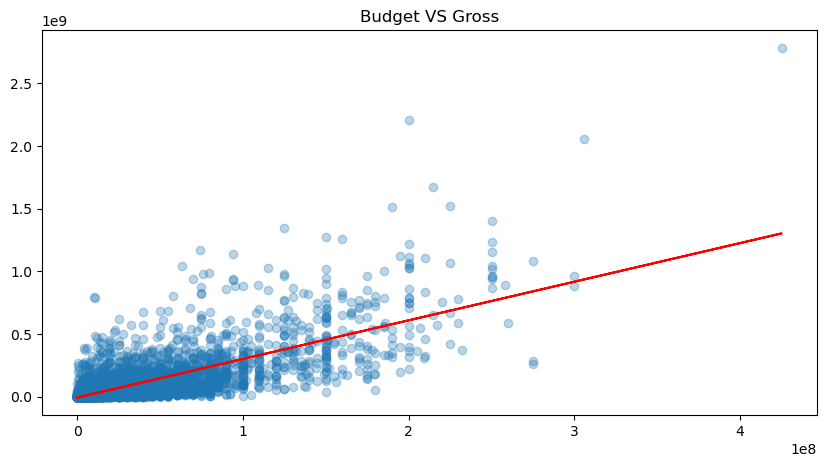

In [24]:
fig, ax = plt.subplots(nrows=1,
                      ncols=1,
                      figsize=(10, 5))
ax.scatter(x=dirty_data['Budget_usd'], y=dirty_data['Gross_usd'], alpha=0.3)
ax.set_title('Budget VS Gross')
ax.plot(dirty_data['Budget_usd'], model.predict(np.array(dirty_data['Budget_usd']).reshape(-1, 1)), color='r')
plt.show()

In [25]:
model.coef_

array([[3.08098244]])

In [26]:
model.intercept_

array([-7096533.24411151])

In [27]:
a = np.array([[1, 2, 3],
              [2, 2, 2]])

In [28]:
fg = pd.DataFrame(a, columns=['A', 'B', 'C'])

In [29]:
fg

,A,B,C
0,1,2,3
1,2,2,2


In [30]:
data[['Release_Date']].shape

(5034, 1)

## $$J(w)=w^2 + 3w$$

In [31]:
def j(w):
    w = np.array(w)
    return w**2 +3*w

In [32]:
def d_j(w):
    return 2*w + 3

In [33]:
new_w = -1
learning_rate = 0.1
w_s = [new_w]
for i in range(100):
    pre_w = new_w
    gradiant = d_j(pre_w)
    new_w = pre_w - learning_rate*gradiant
    w_s.append(new_w)
    
print("The minimum is: ", new_w)
print('the cost is: ', j(new_w))

The minimum is:  -1.4999999998981484
the cost is:  -2.25


In [34]:
points = np.arange(-2, -1, 0.01)


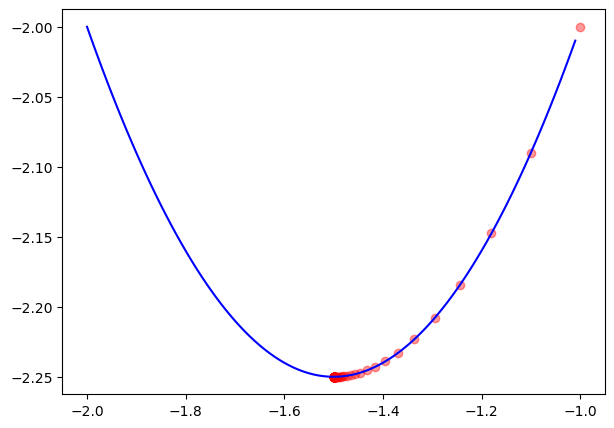

In [35]:
fig, ax0 = plt.subplots(ncols=1,
                             nrows=1,
                            figsize=(7,5))

ax0.plot(points, j(points), color='blue')
ax0.scatter(w_s, j(w_s), color='red', alpha=0.4)
plt.show()

## $$ g(x) = x^4 -4x +5$$

In [36]:
def g(x):
    return x**4 - 4*x**2 + 5

In [37]:
def d_g(x):
    return 4*x**3 - 8*x


In [38]:
def gradient_decent(initial_guess, learning_rate, cost, d_cost, numofiters):
    new_x = initial_guess
    x_s = [initial_guess]
    for i in range(numofiters):
        pre_x = new_x
        grad = d_cost(pre_x)
        new_x = pre_x - learning_rate*grad
        x_s.append(new_x)
    
    x_s = np.array(x_s)
    optimized_x = new_x
    return x_s, optimized_x

In [39]:
x_s, optimized_x = gradient_decent(initial_guess=-0.5, learning_rate=0.01, cost=g, d_cost=d_g, numofiters=1000)

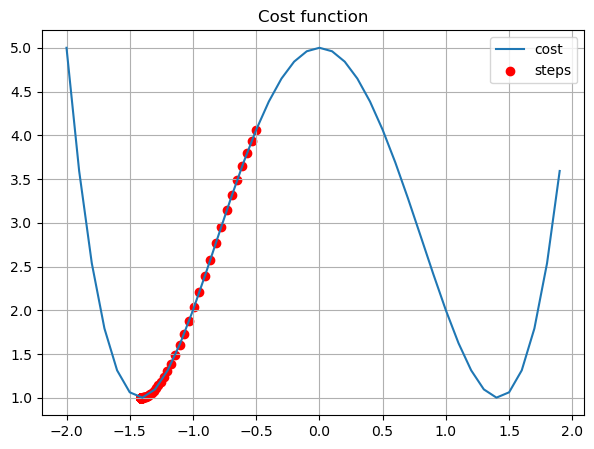

In [40]:
data_points = np.arange(-2, 2, 0.1)
fig, ax = plt.subplots(ncols=1,
                      nrows=1,
                      figsize=(7, 5))

ax.plot(data_points, g(data_points), label='cost')
ax.scatter(x_s, g(np.array(x_s)), color='red', label='steps')
ax.set_title('Cost function')
plt.legend(['cost','steps'])
ax.grid()
plt.show()

In [41]:
def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

data_3 = np.linspace(-2.5, 3, 100)

In [42]:
x_s_2, optimized_x_2 = gradient_decent(initial_guess=0.1, learning_rate=0.1, cost=h, d_cost=dh, numofiters=100)

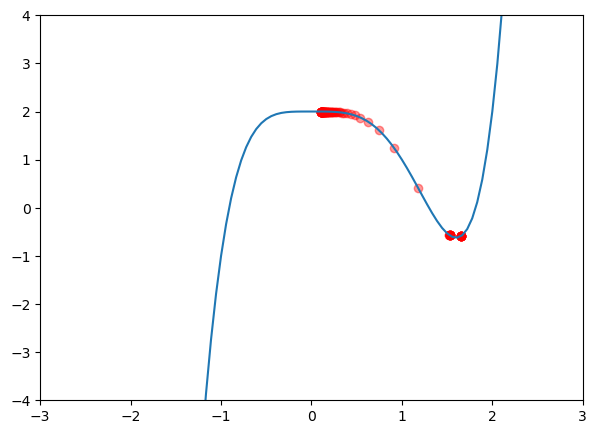

In [43]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(7, 5))

ax.plot(data_3, h(data_3))
ax.set_xlim([-3, 3])
ax.set_ylim([-4, 4])
ax.scatter(x_s_2, h(x_s_2), color='red', alpha=0.4)
plt.show()

In [44]:
x_s_1sadom, optimized_x = gradient_decent(initial_guess=-0.5, learning_rate=0.01, cost=g, d_cost=d_g, numofiters=50)
x_s_5sadom, optimized_x = gradient_decent(initial_guess=-0.5, learning_rate=0.05, cost=g, d_cost=d_g, numofiters=50)

x_s_1dahom, optimized_x = gradient_decent(initial_guess=-0.5, learning_rate=0.1, cost=g, d_cost=d_g, numofiters=50)
x_s_2dahom, optimized_x = gradient_decent(initial_guess=-0.5, learning_rate=0.2, cost=g, d_cost=d_g, numofiters=50)

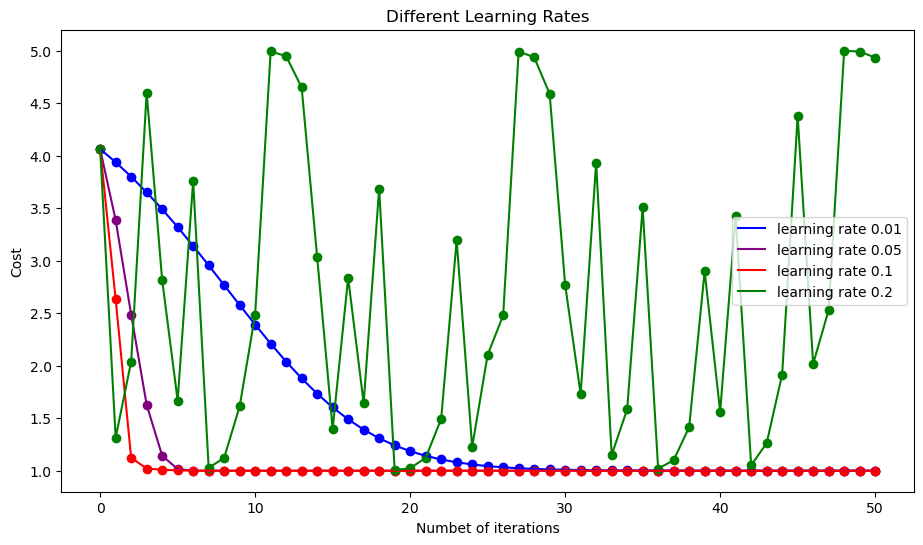

In [45]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(11, 6))

ax.plot(list(range(len(x_s_1sadom))), g(x_s_1sadom),color='blue', label='learning rate 0.01')
ax.scatter(list(range(len(x_s_1sadom))), g(x_s_1sadom), color='blue')

ax.plot(list(range(len(x_s_5sadom))), g(x_s_5sadom),color='purple', label='learning rate 0.05')
ax.scatter(list(range(len(x_s_5sadom))), g(x_s_5sadom), color='purple')

ax.plot(list(range(len(x_s_1dahom))), g(x_s_1dahom),color='red', label='learning rate 0.1')
ax.scatter(list(range(len(x_s_1dahom))), g(x_s_1dahom), color='red')

ax.plot(list(range(len(x_s_2dahom))), g(x_s_2dahom),color='green', label='learning rate 0.2')
ax.scatter(list(range(len(x_s_2dahom))), g(x_s_2dahom), color='green')

ax.set_title('Different Learning Rates')
ax.set_xlabel('Numbet of iterations')
ax.set_ylabel('Cost')
plt.legend()
plt.show()

## Minimising $$ f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1} $$

In [46]:
xx = np.linspace(-2, 2, 200)
yy = np.linspace(-2, 2, 200)

xx, yy = np.meshgrid(xx, yy)

In [47]:
def f(x, y):
    r = (-x**2)-(y**2)
    return 1/((3**r) + 1)

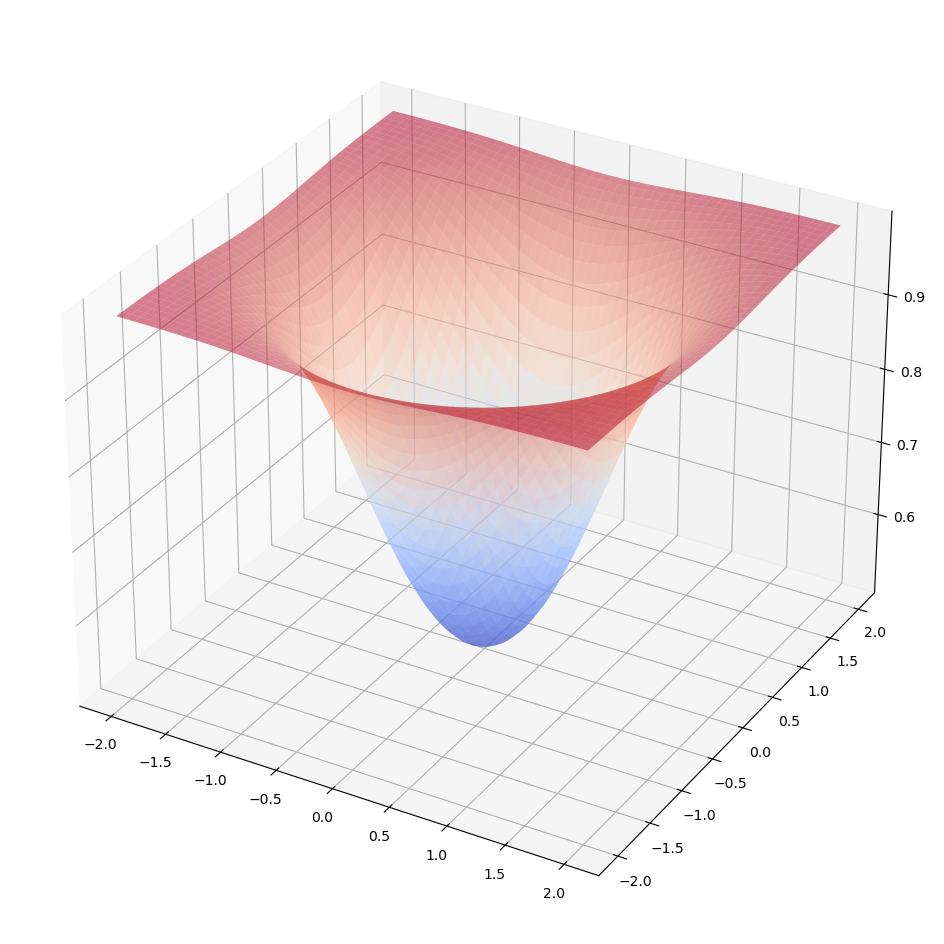

In [48]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(xx, yy, f(xx, yy), cmap=cm.coolwarm, alpha=0.5)

In [49]:
a, b = symbols('x, y')
diff(f(a, b), b)

2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2

In [50]:
f(a, b)

1/(3**(-x**2 - y**2) + 1)

In [51]:

def Gradient_Decent(initial_guess, num_iters, learning_rate, cost_function):
    X_s = [initial_guess[0]]
    Y_s = [initial_guess[1]]
    def diff_(cost_function):
        a, b = symbols('x, y')
        dx = diff(cost_function(a, b), a)
        dy = diff(cost_function(a, b), b)
        return dx, dy
    dx = diff_(cost_function)[0]
    dy = diff_(cost_function)[1]
    new_x = initial_guess[0]
    new_y = initial_guess[1]
    for i in range(num_iters):
        pre_x = new_x
        pre_y = new_y
        new_x = pre_x - learning_rate*dx.evalf(subs={a:pre_x, b:pre_y})
        new_y = pre_y - learning_rate*dy.evalf(subs={a:pre_x, b:pre_y})
        X_s.append(new_x)
        Y_s.append(new_y)
    X_s = np.array(X_s)
    Y_s = np.array(Y_s)
    x_min = new_x
    y_min = new_y
    minimum_cost = cost_function(x_min, y_min)
    return X_s, Y_s, x_min, y_min, minimum_cost
    

In [52]:
x_steps, y_steps, x_min, y_min, minimum_cost = Gradient_Decent(initial_guess=(1, 1), num_iters=500, learning_rate=0.1, cost_function=f)

In [53]:
minimum_cost

0.500000000000000

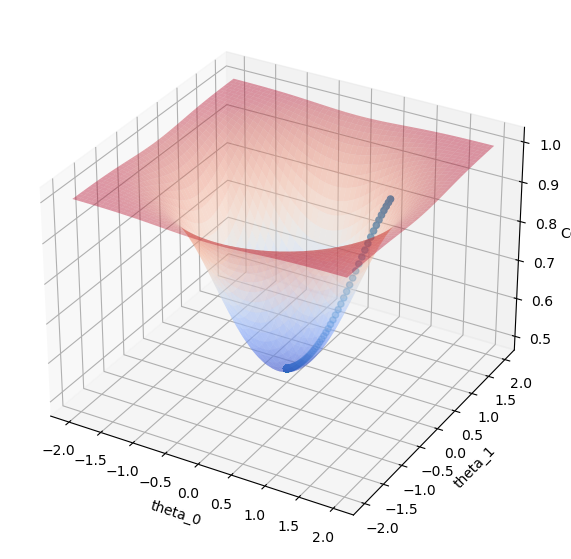

In [54]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, f(xx, yy), cmap=cm.coolwarm, alpha=0.4)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost')

ax.scatter(x_steps, y_steps, f(x_steps, y_steps))

In [55]:
xxx = np.array([[1, 2 ,3]])
eee = np.array([[4, 5, 6]])

In [56]:
ddd = np.concatenate((xxx, eee), axis=1)
ddd

array([[1, 2, 3, 4, 5, 6]])

In [57]:
xxx.shape

(1, 3)

In [58]:
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).reshape(7, 1)
y_5 = np.array([[1.7, 2.4, 3.5, 3, 6.1, 9.4, 8.2]]).reshape(7, 1)

In [59]:
x_5.shape

(7, 1)

In [60]:
regr = LinearRegression()
regr.fit(x_5, y_5)

LinearRegression()

In [61]:
theta_0 = regr.intercept_
theta_1 = regr.coef_

print('theta_0 is: ', theta_0)
print('theta_1 is: ', theta_1 )

theta_0 is:  [0.84753515]
theta_1 is:  [[1.22272646]]


Text(0, 0.5, 'Y')

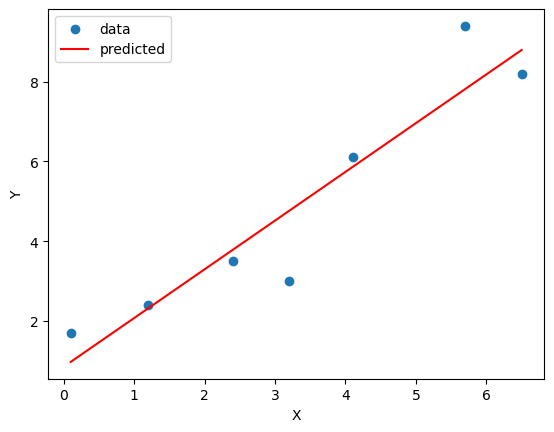

In [62]:
fig, ax = plt.subplots()
ax.scatter(x_5, y_5, label='data')
ax.plot(x_5, x_5 * theta_1[0][0] + theta_0[0], color='red', label='predicted')
plt.legend(['data', 'predicted'])
ax.set_xlabel('X')
ax.set_ylabel('Y')

In [63]:
y_5

array([[1.7],
       [2.4],
       [3.5],
       [3. ],
       [6.1],
       [9.4],
       [8.2]])

In [64]:
y_hat = x_5 * 1.22272646 + 0.84753515
y_hat

array([[0.9698078 ],
       [2.3148069 ],
       [3.78207865],
       [4.76025982],
       [5.86071364],
       [7.81707597],
       [8.79525714]])

In [65]:
def MSE(y, y_hat):
    j = np.square(y - y_hat)
    return j.sum()/len(y)

MSE(y_5, y_hat)
    

0.9479655759794579

In [66]:
np.array([[-1]])

array([[-1]])

In [67]:
random_theta_0 = np.linspace(start=-3, stop=5, num=500)
random_theta_1 = np.linspace(start=-3, stop=5, num=500)

In [68]:
random_theta_0, random_theta_1 = np.meshgrid(random_theta_0, random_theta_1)


In [69]:
def different_cost_points(x, y, random_theta_0, random_theta_1):
    points = np.zeros((500, 500))
    for t in range(len(random_theta_0)):
        for i in range(len(random_theta_1)):
            y_hat = x*random_theta_1[t][i] + random_theta_0[t][i]
            points[t][i]=MSE(y, y_hat)
            
    return points
    

In [70]:
cost_points = different_cost_points(x=x_5, y=y_5, random_theta_0=random_theta_0, random_theta_1=random_theta_1)


In [71]:
cost_points

array([[401.10714286, 400.53528422, 399.96393965, ..., 180.25366195,
        179.93728823, 179.62142857],
       [398.59392784, 398.02377293, 397.45413208, ..., 178.58719695,
        178.27252695, 177.95837102],
       [396.08871739, 395.5202662 , 394.95232907, ..., 176.92873651,
        176.61577024, 176.30331802],
       ...,
       [138.64903803, 138.92392941, 139.19933484, ..., 338.63031361,
        339.16068991, 339.69158026],
       [140.11408816, 140.39068327, 140.66779242, ..., 340.94211376,
        341.47419378, 342.00678785],
       [141.58714286, 141.86544168, 142.14425456, ..., 343.26191846,
        343.7957022 , 344.33      ]])

In [72]:
cost_points.shape

(500, 500)

In [73]:
random_theta_0.shape

(500, 500)

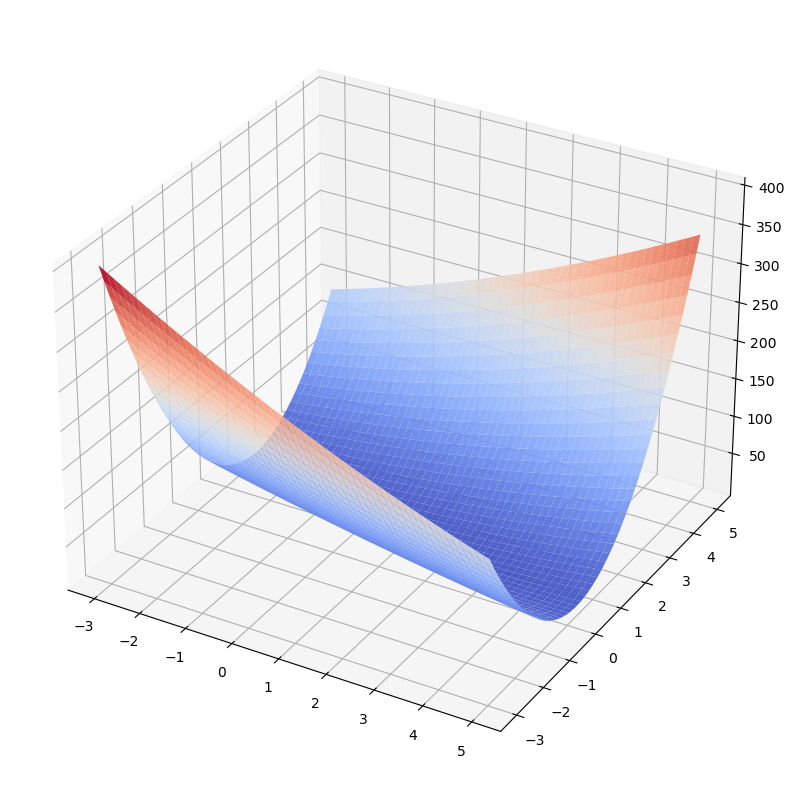

In [74]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(random_theta_0, random_theta_1, cost_points, alpha=0.9, cmap=cm.coolwarm)

In [75]:
cost_points.min()

0.948169037760606

In [92]:
def grad(x, y, thetas):
    n = y.size
    theta_0_slope = (-2/n)*sum(y - (thetas[0] + thetas[1]*x))
    theta_1_slope = (-2/n)*sum((y - (thetas[0] + thetas[1]*x))*x)
    return np.concatenate((theta_0_slope, theta_1_slope), axis=0)

In [154]:
learning_rate = 0.01
thetas = np.array([2.9, 2.9])
plot_thetas = [thetas]
plot_vals = np.array([MSE(y_5, thetas[0] + thetas[1]*x_5)])
for i in range(500):
    thetas = thetas - learning_rate*grad(x_5, y_5, thetas)
    plot_vals = np.concatenate((plot_vals, np.array([MSE(y_5, thetas[0] + thetas[1]*x_5)])), axis=0)
    plot_thetas.append(thetas)
    
plot_thetas = np.array(plot_thetas)
thetas[0]


0.9433220987777645

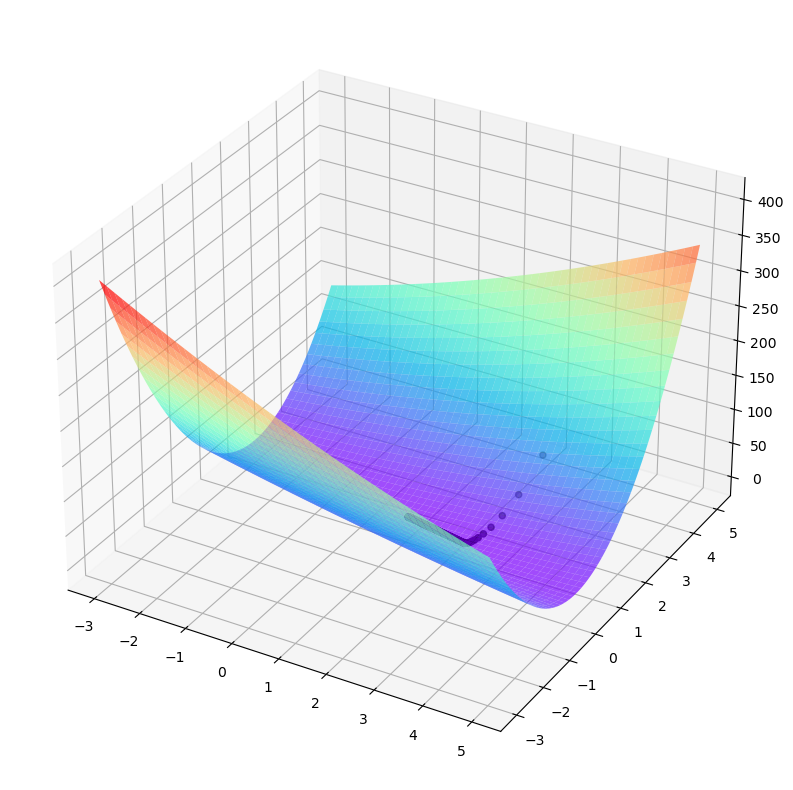

In [161]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(random_theta_0, random_theta_1, cost_points, alpha=0.7, cmap=cm.rainbow)
ax.scatter(plot_thetas[:, 0], plot_thetas[:, 1], plot_vals, color='black')